In [50]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import string

In [4]:
# Configure plot style for better visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:
# Load the dataset
df = pd.read_csv("/home/ayalk94/Documents/GitHub/week-long-challenge/Data/raw_analyst_ratings.csv")

In [9]:
# Display the first few rows of the dataset for a quick overview
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A 

In [10]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [11]:
# Handle missing data (Example: Drop rows with missing headlines or dates)
df.dropna(subset=['headline', 'date'], inplace=True)

In [14]:
# Convert 'date' column to datetime and make timezone-naive
# df['date'] = pd.to_datetime(df['date'], utc=True).dt.tz_convert(None)
# Convert 'date' column to datetime (automatically handles different formats)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Make timezone-naive by localizing to None if timezone information exists
df['date'] = df['date'].dt.tz_localize(None)

In [15]:
# Basic descriptive statistics of the dataset
print("\nDescriptive statistics of numeric columns:")
print(df.describe())


Descriptive statistics of numeric columns:
         Unnamed: 0                           date
count  1.407328e+06                          55987
mean   7.072454e+05  2018-09-24 13:13:18.521925376
min    0.000000e+00            2011-04-27 21:01:48
25%    3.538128e+05     2017-06-14 23:40:07.500000
50%    7.072395e+05            2020-01-16 11:22:53
75%    1.060710e+06     2020-05-06 05:34:23.500000
max    1.413848e+06            2020-06-11 17:12:35
std    4.081009e+05                            NaN


In [16]:
# Descriptive statistics of the 'headline_length'
df['headline_length'] = df['headline'].apply(len)
print("\nDescriptive statistics for headline length:")
print(df['headline_length'].describe())


Descriptive statistics for headline length:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


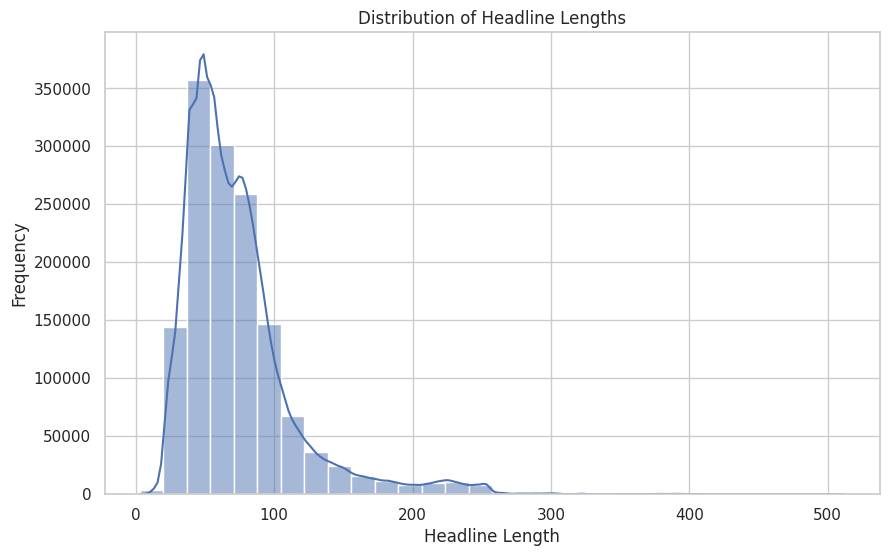

In [17]:
# Plot the distribution of headline lengths
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()

### Publisher Analysis

#### Publisher Article Count


 ##### Purpose: Count the number of articles contributed by each publisher.
    

In [18]:
# Article count per publisher
publisher_counts = df['publisher'].value_counts()

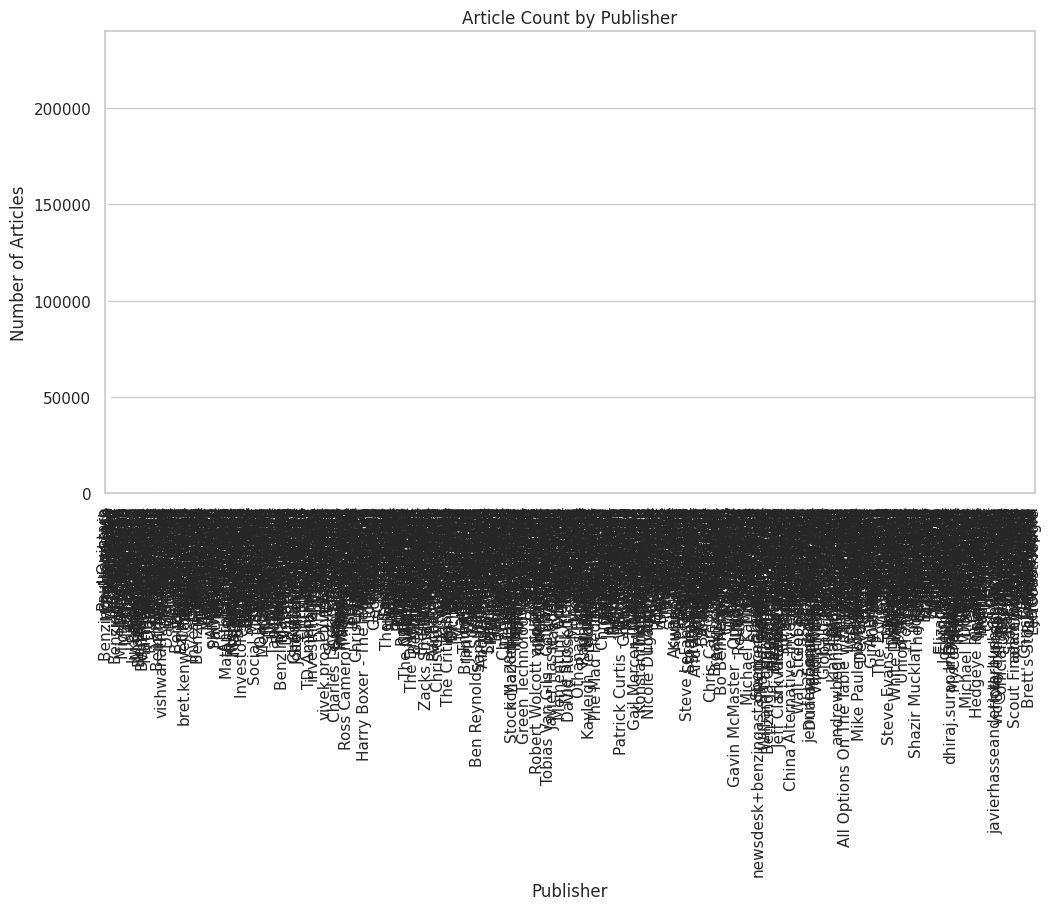

In [19]:
# Plot article count per publisher
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title("Article Count by Publisher")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=90)
plt.show()

### Top 10 Publishers

##### Purpose: Identify and visualize the top 10 publishers by article count.

In [47]:
# Display top publishers
print("Top publishers by number of articles:")
print(publisher_counts.head(10))

Top publishers by number of articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [25]:
# Publisher Analysis: Top 10 publishers by article count
top_10_publishers = publisher_counts.head(10)

/tmp/ipykernel_94221/2258604062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values, palette="viridis")


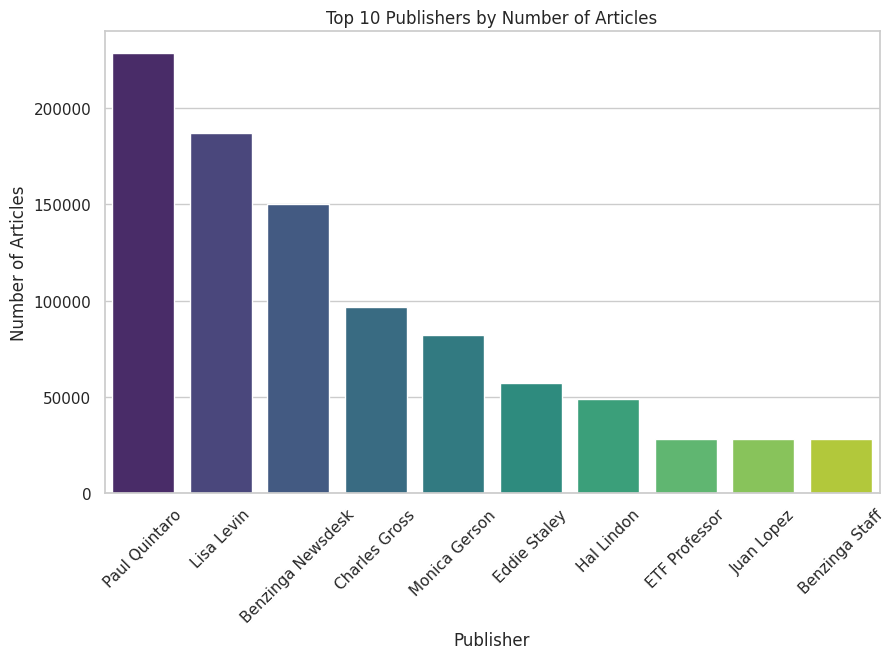

In [26]:
# Plot top 10 publishers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values, palette="viridis")
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

### Publisher Domain Analysis (for Email Addresses)

##### Assuming some publisher names are in the form of email addresses, we can extract the domains to identify the organizations.

/tmp/ipykernel_94221/2200610549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers['domain'] = email_publishers['publisher'].apply(lambda x: x.split('@')[-1])


Top domains by number of articles:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


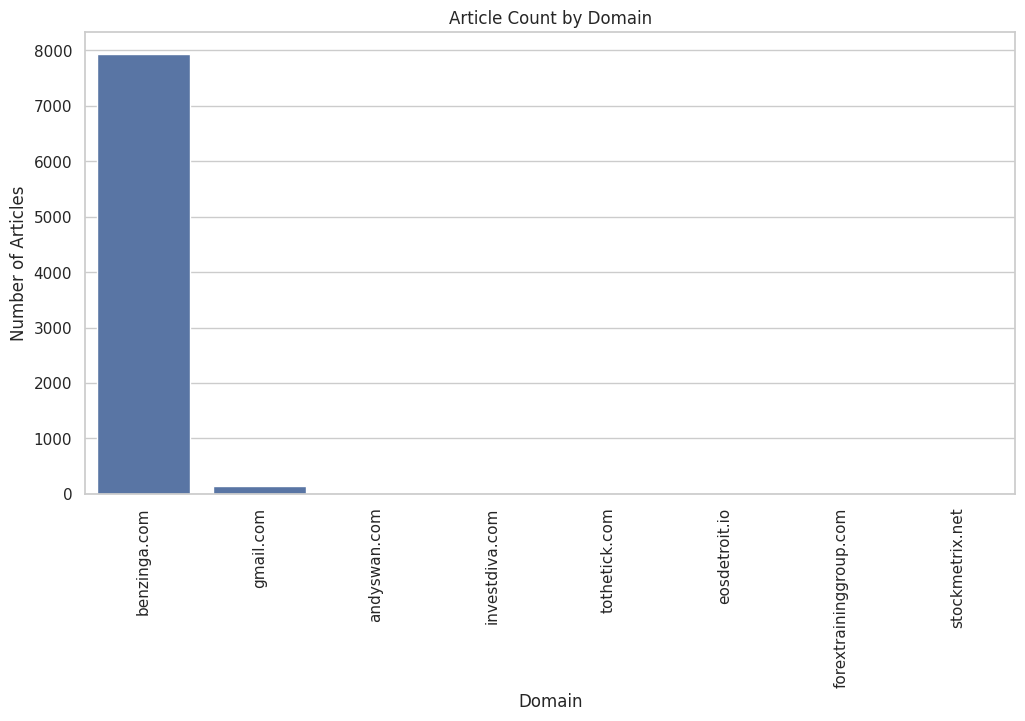

In [48]:
# Check if publishers are emails (simplified example)
email_publishers = df[df['publisher'].str.contains("@")]

# Extract domains from email addresses
email_publishers['domain'] = email_publishers['publisher'].apply(lambda x: x.split('@')[-1])

# Count articles per domain
domain_counts = email_publishers['domain'].value_counts()

# Display top domains
print("Top domains by number of articles:")
print(domain_counts.head(10))

# Plot article count per domain
plt.figure(figsize=(12, 6))
sns.barplot(x=domain_counts.index, y=domain_counts.values)
plt.title("Article Count by Domain")
plt.xlabel("Domain")
plt.ylabel("Number of Articles")
plt.xticks(rotation=90)
plt.show()


### Further Analysis of News Type by Publisher

In [51]:


# Function to clean text by removing punctuation and stopwords
def clean_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Get top 10 publishers
top_publishers = df['publisher'].value_counts().head(10).index

# Analyze top keywords for each of the top publishers
for publisher_name in top_publishers:
    publisher_articles = df[df['publisher'] == publisher_name]['headline']
    
    # Clean text and count keywords
    all_words = []
    for headline in publisher_articles:
        all_words.extend(clean_text(headline))

    # Display top 10 keywords
    top_keywords = Counter(all_words).most_common(10)
    print(f"Top keywords for {publisher_name}:")
    print(top_keywords)
    print()  # Add a newline for better readability

Top keywords for Paul Quintaro:
[('vs', 86097), ('est', 82572), ('eps', 57011), ('reports', 55269), ('sales', 31401), ('shares', 22806), ('sees', 20733), ('announces', 20374), ('inc', 19700), ('pt', 15393)]

Top keywords for Lisa Levin:
[('stocks', 68373), ('moving', 32324), ('session', 32324), ('top', 31267), ('market', 30329), ('biggest', 29090), ('benzingas', 28365), ('midday', 28141), ('52week', 25298), ('update', 23073)]

Top keywords for Benzinga Newsdesk:
[('shares', 42657), ('trading', 38836), ('estimate', 29403), ('stocks', 27856), ('eps', 27423), ('sales', 27376), ('companies', 22019), ('new', 21456), ('several', 19671), ('higher', 19013)]

Top keywords for Charles Gross:
[('vs', 16730), ('option', 15732), ('alert', 15672), ('ask', 12072), ('oi', 11208), ('says', 8237), ('est', 8161), ('sweep', 8110), ('calls', 7786), ('earnings', 7634)]

Top keywords for Monica Gerson:
[('top', 28166), ('stocks', 24824), ('earnings', 19526), ('scheduled', 16625), ('4', 13733), ('industry', 1

### Text Analysis(Sentiment analysis & Topic Modeling)

### Sentiment Analysis

sentiment_label
neutral     934914
positive    341178
negative    131236
Name: count, dtype: int64


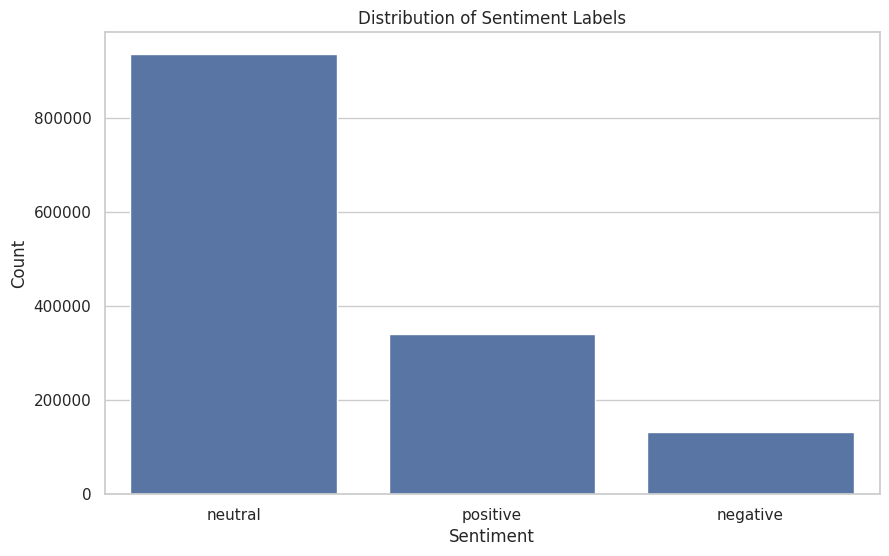

In [59]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each headline
df['sentiment'] = df['headline'].apply(get_sentiment)

# Classify the sentiment as positive, negative, or neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display sentiment counts
print(df['sentiment_label'].value_counts())

# Plot the distribution of sentiment labels
sns.countplot(x='sentiment_label', data=df)
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


### Topic Modeling and Keyword Extraction

Top 20 keywords:
['announces' 'benzingas' 'buy' 'downgrades' 'earnings' 'eps' 'est'
 'market' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'top'
 'trading' 'update' 'upgrades' 'vs']


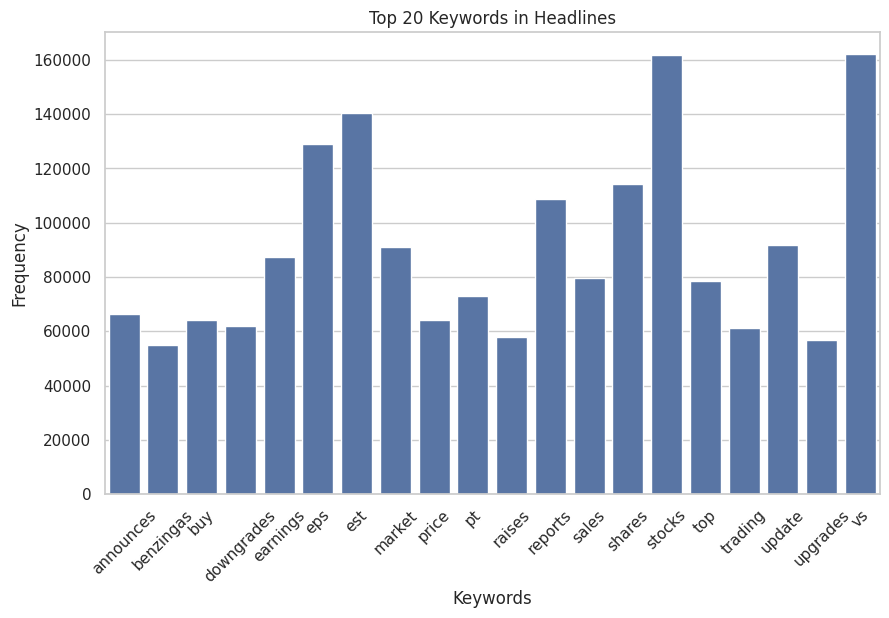

In [60]:
from sklearn.feature_extraction.text import CountVectorizer


# Function to clean text by removing punctuation and stopwords
def clean_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Clean headlines
df['cleaned_headline'] = df['headline'].apply(clean_text)

# Extract common keywords using CountVectorizer
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(df['cleaned_headline'])
keywords = vectorizer.get_feature_names_out()

# Display the top 20 keywords
print("Top 20 keywords:")
print(keywords)

# Plot the frequency of the top keywords
keyword_counts = X.toarray().sum(axis=0)
sns.barplot(x=keywords, y=keyword_counts)
plt.title("Top 20 Keywords in Headlines")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### Advanced Topic Modeling Using LDA

In [61]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize headlines using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['cleaned_headline'])

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(tfidf)

# Display the top words in each topic
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{idx + 1}:")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #1:
['maintains', 'stocks', 'coverage', 'initiates', 'price', 'announces', 'target', 'pt', '52week', 'buy']
Topic #2:
['pt', 'gainers', 'analyst', 'morgan', 'movers', 'biggest', 'bank', 'upgrades', 'downgrades', 'benzingas']
Topic #3:
['reports', 'week', 'deal', 'update', 'announces', 'watch', 'etfs', 'says', 'scheduled', 'earnings']
Topic #4:
['midday', 'update', 'premarket', 'higher', 'trading', 'moving', 'session', 'stocks', 'market', 'shares']
Topic #5:
['q2', 'estimate', 'q1', 'q4', 'sees', 'sales', 'reports', 'eps', 'est', 'vs']



### Time Series Analysis

##### Purpose: Analyze publication trends over time.

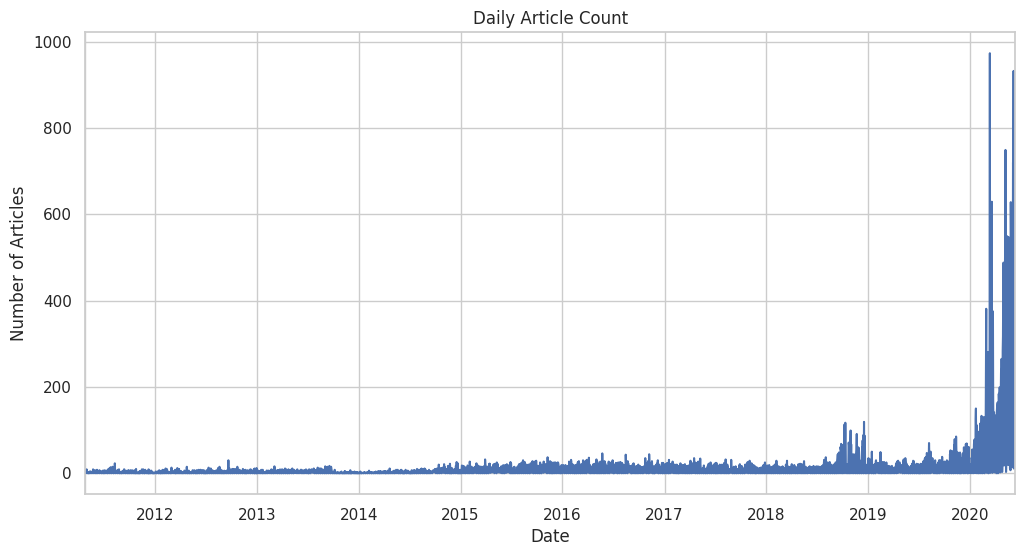

In [55]:
# Plot daily article count
plt.figure(figsize=(12, 6))
daily_article_count.plot()
plt.title("Daily Article Count")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

### Rolling Average Plot

##### Purpose: Plot a rolling average to smooth out short-term fluctuations.

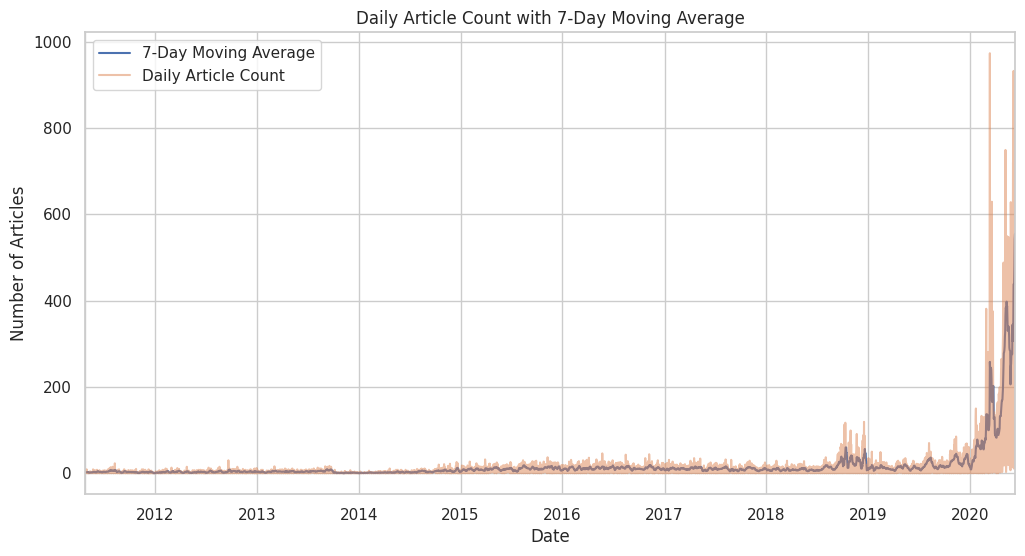

In [56]:
# Additional: Plot article counts over time with rolling average
plt.figure(figsize=(12, 6))
daily_article_count.rolling(window=7).mean().plot(label='7-Day Moving Average')
daily_article_count.plot(alpha=0.5, label='Daily Article Count')
plt.title("Daily Article Count with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend()
plt.grid(True)
plt.show()

### Detecting Spikes in Publication Frequency

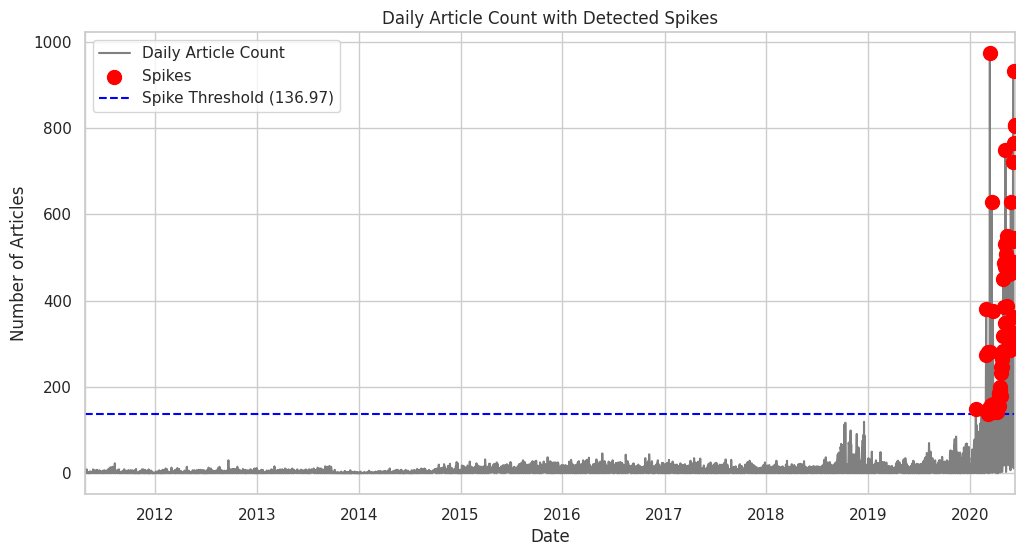

In [62]:
# Define a threshold for identifying spikes (e.g., mean + 2 standard deviations)
mean_count = daily_article_count.mean()
std_count = daily_article_count.std()
threshold = mean_count + 2 * std_count

# Identify days with spikes in publication frequency
spike_days = daily_article_count[daily_article_count > threshold]

# Plot daily publication count with spikes highlighted
plt.figure(figsize=(12, 6))
daily_article_count.plot(label='Daily Article Count', color='gray')
plt.scatter(spike_days.index, spike_days.values, color='red', label='Spikes', s=100, zorder=5)
plt.axhline(y=threshold, color='blue', linestyle='--', label=f'Spike Threshold ({round(threshold, 2)})')
plt.title("Daily Article Count with Detected Spikes")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend()
plt.grid(True)
plt.show()


### Analyzing Publication Times

/tmp/ipykernel_94221/1715558261.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_article_count.index, y=hourly_article_count.values, palette="viridis")


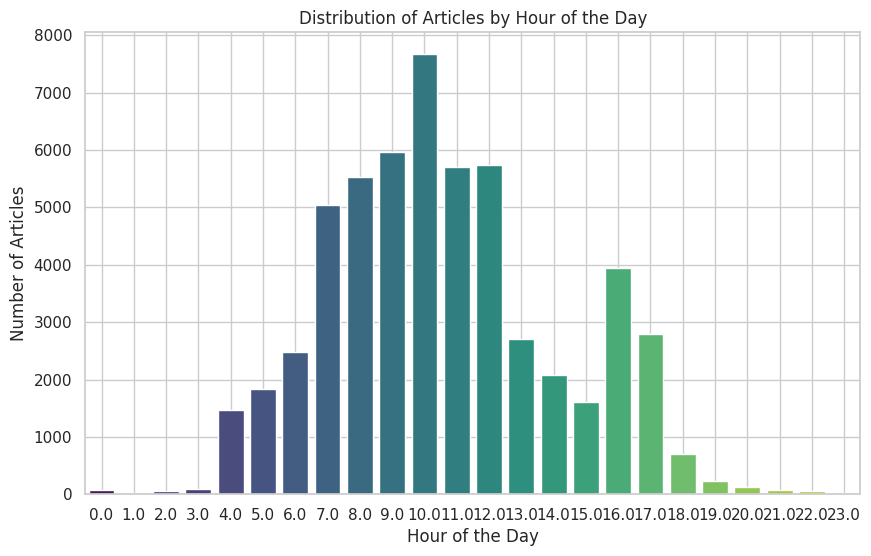

In [63]:
# Extract the hour of publication from the datetime index
df['hour'] = df.index.hour

# Count the number of articles published at each hour
hourly_article_count = df['hour'].value_counts().sort_index()

# Plot the distribution of publishing times by hour
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_article_count.index, y=hourly_article_count.values, palette="viridis")
plt.title("Distribution of Articles by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()


### Additional Time Series Analysis

#### Weekly and Monthly Article Count

##### Purpose: Analyze the frequency of articles published weekly, monthly, and yearly.

In [27]:
# Time Series Analysis: Articles published per week
weekly_article_count = df['headline'].resample('W').count()

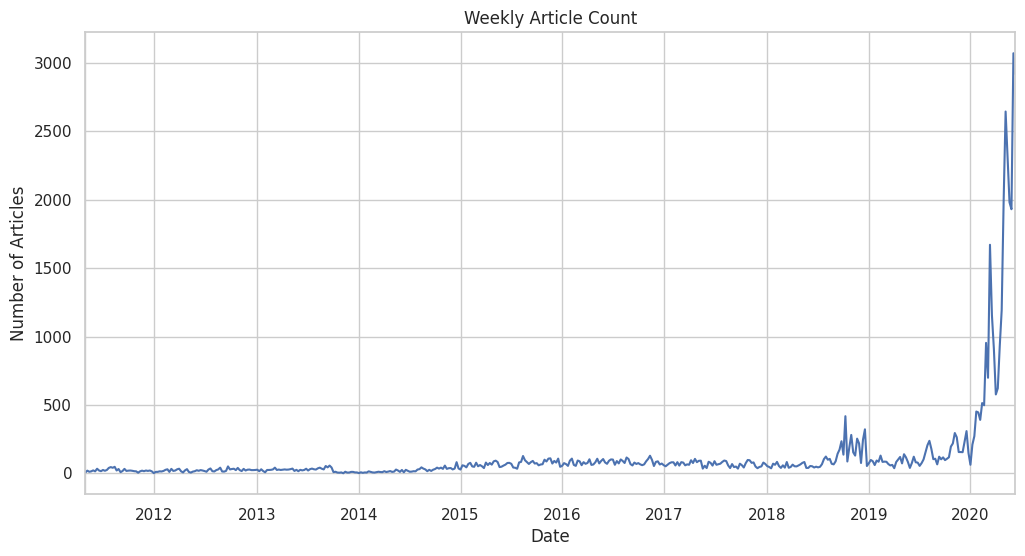

In [28]:
# Plot weekly article count
plt.figure(figsize=(12, 6))
weekly_article_count.plot()
plt.title("Weekly Article Count")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

In [30]:
# Additional: Check publication trends by month and year
monthly_article_count = df['headline'].resample('ME').count()
yearly_article_count = df['headline'].resample('YE').count()


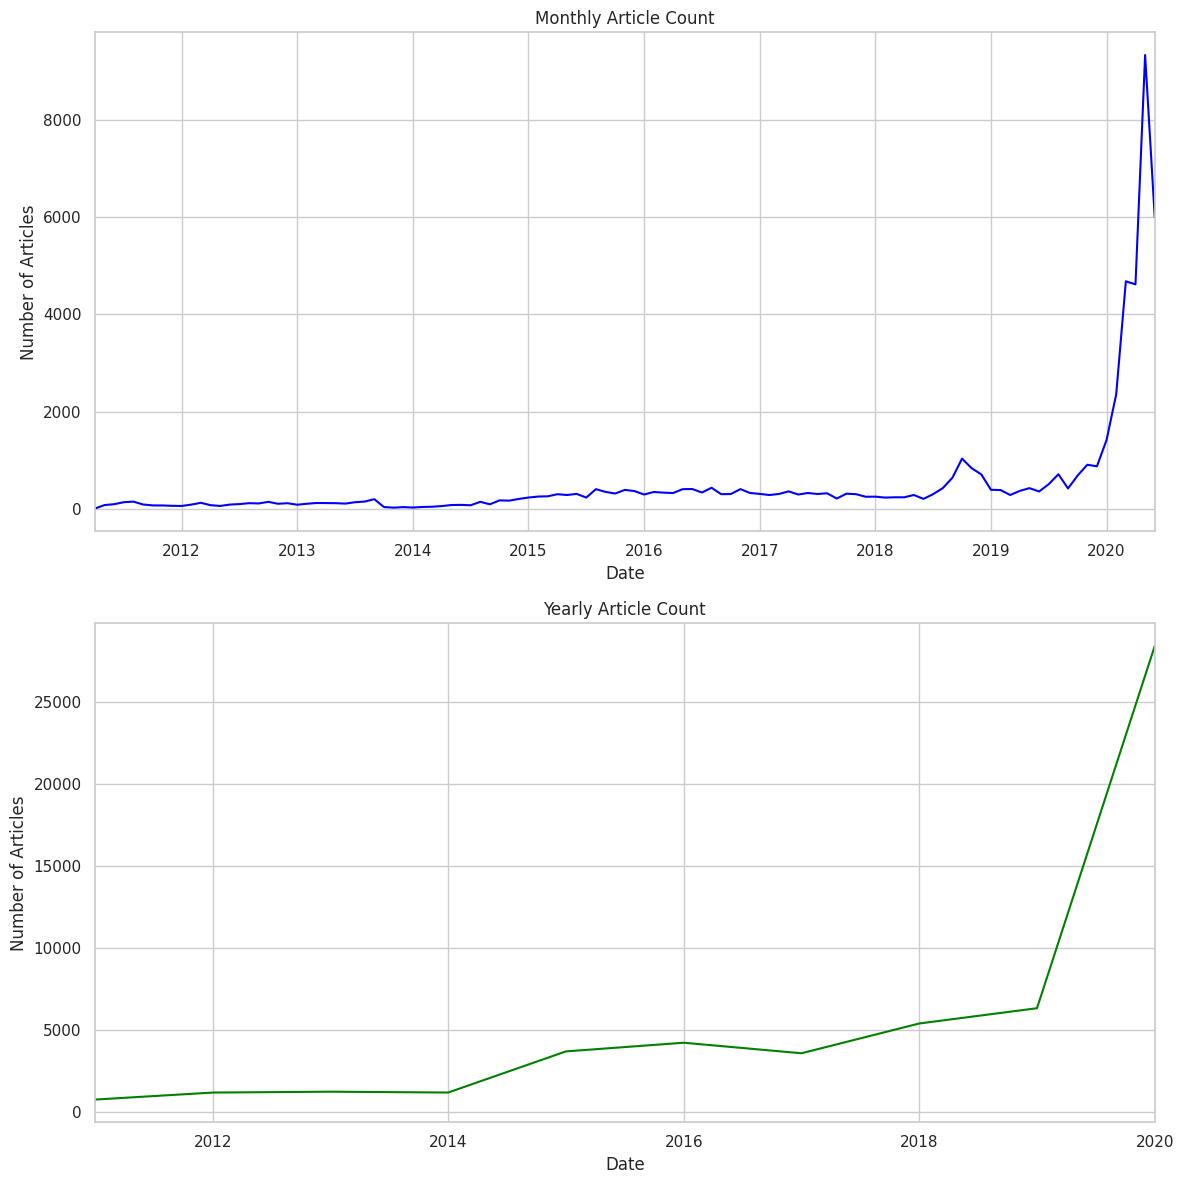

In [35]:
# Plot monthly and yearly article counts
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

monthly_article_count.plot(ax=ax[0], color='blue')
ax[0].set_title("Monthly Article Count")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of Articles")

yearly_article_count.plot(ax=ax[1], color='green')
ax[1].set_title("Yearly Article Count")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Articles")

plt.tight_layout()
plt.show()